In [66]:
import os

# Step 1: Set the base directory to your specified path
base_dir = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input'

# Step 2: Explore directories and files
for dirname, _, filenames in os.walk(base_dir):
    print(dirname)


D:\Studyy Materials\Sem 3\Practical\AI Tools\Input
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\Categorized_Images
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\Categorized_Images\Left_Cataract
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\Categorized_Images\Normal
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\Categorized_Images\Right_Cataract
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\LBP_Dataset
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\LBP_PReprocess_Data
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\ODIR-5K
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\ODIR-5K\ODIR-5K
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\ODIR-5K\ODIR-5K\Testing Images
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\ODIR-5K\ODIR-5K\Training Images
D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\preprocessed_images


In [68]:
import os
import cv2
import numpy as np
from skimage import feature
from tqdm import tqdm

# Define directories
input_dir = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\preprocessed_images'
output_dir = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\LBP_Images'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to calculate LBP
def calculate_lbp(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate LBP
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    # Convert LBP image to a scale of 0-255
    lbp = (lbp * (255.0 / lbp.max())).astype("uint8")
    return lbp

# Process each image in the input directory
for filename in tqdm(os.listdir(input_dir)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(input_dir, filename)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Calculate LBP
        lbp_image = calculate_lbp(image)
        
        # Save the LBP image with the same filename in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, lbp_image)

print("LBP conversion completed. Images saved in:", output_dir)


100%|██████████████████████████████████████████████████████████████████████████████| 6392/6392 [03:43<00:00, 28.63it/s]

LBP conversion completed. Images saved in: D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\LBP_Images


In [69]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Set the path to the CSV file
csv_file_path = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\full_df.csv'

# Step 2: Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Step 3: Display the first few rows of the DataFrame
print(df.head())


   ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative re

In [77]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [78]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [79]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]


array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [80]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [81]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [82]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg',
       '1610_right.jpg', '394_right.jpg', '4362_right.jpg',
       '2905_right.jpg', '2569_right.jpg', '2923_right.jpg',
       '2481_right.jpg', '3183_right.jpg', '2957_right.jpg',
       '3437_right.jpg', '3003_right.jpg', '2430_right.jpg',
       '3001_right.jpg', '3115_right.jpg', '2847_right.jpg',
       '3360_right.jpg', '3440_right.jpg', '2380_right.jpg',
       '159_right.jpg', '2749_right.jpg', '2864_right.jpg',
       '3020_right.jpg', '2525_right.jpg', '2414_right.jpg',
       '1143_right.jpg', '2730_right.jpg', '1421_right.jpg',
       '1441_right.jpg', '3267_right.jpg', '4074_right.jpg',
       '3401_right.jpg', '2399_right.jpg', '2514_right.jpg',
       '2609_right.jpg', '2900_

In [76]:
import os
import shutil
import cv2
import numpy as np

# Define the source and destination directories
source_dir = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\LBP_PReprocess_Data'  # Adjust if necessary
destination_dir = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\Categorized_Images\Normal'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# List of images to save
left_normal = df.loc[(df.C == 0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250, random_state=42).values
right_normal = df.loc[(df.C == 0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250, random_state=42).values

# Combine both arrays
normal_images = np.concatenate((left_normal, right_normal))

# Save each image to the new directory
for img in normal_images:
    src_img_path = os.path.join(source_dir, img)  # Source image path
    dest_img_path = os.path.join(destination_dir, img)  # Destination image path
    
    try:
        # Read the image to ensure it exists
        image = cv2.imread(src_img_path)
        if image is not None:
            # Save the image in the new directory
            cv2.imwrite(dest_img_path, image)
            print(f"Saved {img} to {destination_dir}")
        else:
            print(f"Image {img} could not be read.")
    except Exception as e:
        print(f"Error processing image {img}: {e}")


Image 3332_left.jpg could not be read.
Image 4059_left.jpg could not be read.
Image 69_left.jpg could not be read.
Image 2415_left.jpg could not be read.
Image 4176_left.jpg could not be read.
Image 2711_left.jpg could not be read.
Image 4614_left.jpg could not be read.
Image 3174_left.jpg could not be read.
Image 2862_left.jpg could not be read.
Image 2424_left.jpg could not be read.
Image 3193_left.jpg could not be read.
Image 3306_left.jpg could not be read.
Image 2961_left.jpg could not be read.
Image 2425_left.jpg could not be read.
Image 2858_left.jpg could not be read.
Image 3180_left.jpg could not be read.
Image 2668_left.jpg could not be read.
Image 2659_left.jpg could not be read.
Image 2336_left.jpg could not be read.
Image 277_left.jpg could not be read.
Image 2897_left.jpg could not be read.
Image 1151_left.jpg could not be read.
Image 3011_left.jpg could not be read.
Image 3083_left.jpg could not be read.
Image 4059_left.jpg could not be read.
Image 4576_left.jpg could no

In [83]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [84]:
print(len(cataract),len(normal))

594 500


In [85]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

dataset_dir = r'D:\Studyy Materials\Sem 3\Practical\AI Tools\Input\LBP_Images'  # Adjust according to your directory structure
image_size = 224
labels = []
dataset = []

def create_dataset(image_category, label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (image_size, image_size))
            dataset.append([np.array(image), np.array(label)])
        except Exception as e:
            print(f"Error loading image {img}: {e}")
            continue
    
    random.shuffle(dataset)
    return dataset


In [86]:
dataset = create_dataset(cataract,1)
print(len(dataset))

 12%|█████████▍                                                                      | 70/594 [00:00<00:03, 138.92it/s]

Error loading image 2102_left.jpg: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



 31%|████████████████████████▏                                                      | 182/594 [00:01<00:02, 199.89it/s]

Error loading image 2231_left.jpg: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Error loading image 2244_left.jpg: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Error loading image 2251_left.jpg: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



 91%|████████████████████████████████████████████████████████████████████████▏      | 543/594 [00:02<00:00, 278.13it/s]

Error loading image 1456_right.jpg: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



100%|███████████████████████████████████████████████████████████████████████████████| 594/594 [00:02<00:00, 206.46it/s]

Error loading image 2229_right.jpg: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

588


In [87]:
dataset = create_dataset(normal,0)
len(dataset)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 146.79it/s]


1088

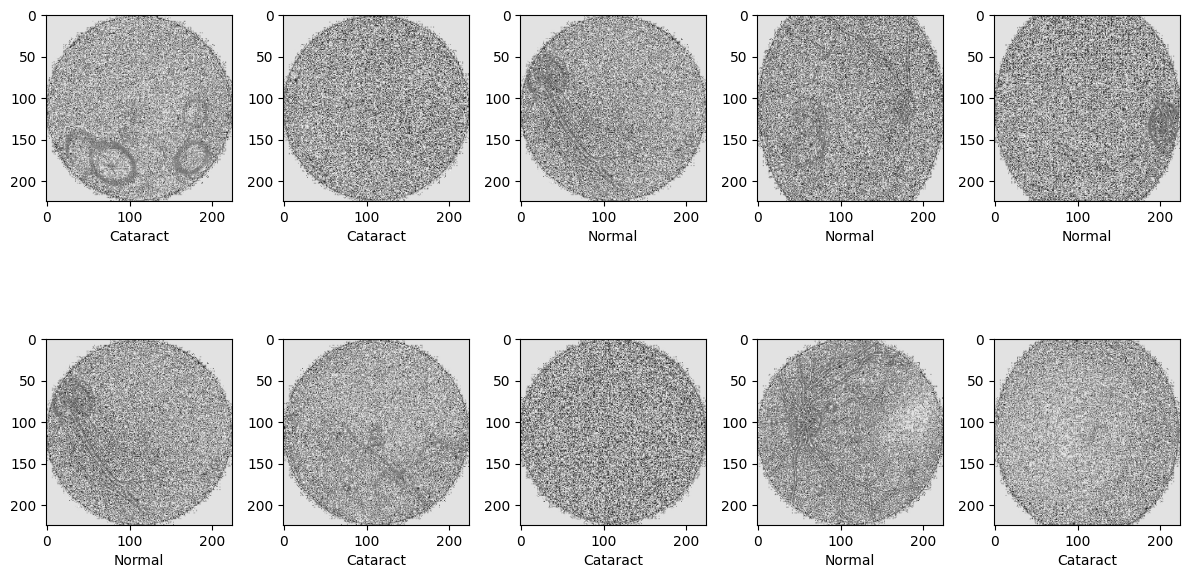

In [88]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 

In [89]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# VGG19

In [91]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [92]:
for layer in vgg.layers:
    layer.trainable = False

In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model1 = Sequential()
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [94]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [95]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Replace 'period' with 'save_freq' for the ModelCheckpoint
checkpoint = ModelCheckpoint(
    "vgg19.h5", monitor="val_accuracy", verbose=1, save_best_only=True,
    save_weights_only=False, save_freq='epoch'  # Save at the end of every epoch
)

# Early stopping callback remains the same
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)


In [96]:
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 5.7738 - accuracy: 0.6483
Epoch 1: val_accuracy improved from -inf to 0.79817, saving model to vgg19.h5
28/28 [==============================] - 156s 6s/step - loss: 5.7738 - accuracy: 0.6483 - val_loss: 1.5617 - val_accuracy: 0.7982
Epoch 2/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - ETA: 0s - loss: 0.8449 - accuracy: 0.8494
Epoch 2: val_accuracy improved from 0.79817 to 0.83486, saving model to vgg19.h5
28/28 [==============================] - 175s 6s/step - loss: 0.8449 - accuracy: 0.8494 - val_loss: 0.6006 - val_accuracy: 0.8349
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.9057
Epoch 3: val_accuracy improved from 0.83486 to 0.86239, saving model to vgg19.h5
28/28 [==============================] - 173s 6s/step - loss: 0.3210 - accuracy: 0.9057 - val_loss: 0.5374 - val_accuracy: 0.8624
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9575
Epoch 4: val_accuracy improved from 0.86239 to 0.90367, saving model to vgg19.h5
28/28 [==============================] - 172s 6s/step - loss: 0.1431 - accuracy: 0.9575 - val_loss: 0.3539 - val_accuracy: 0.9037
Epoch 5/10
28/28 [==============================] - ETA: 0s - loss: 0.0847 - accuracy: 0.9644
Ep

In [97]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 34s 5s/step - loss: 0.3726 - accuracy: 0.9220
loss: 0.3726215064525604
Accuracy: 0.9220183491706848


In [98]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred1)

7/7 [==============================] - 35s 5s/step


0.9220183486238532

In [99]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       104
           1       0.89      0.97      0.93       114

    accuracy                           0.92       218
   macro avg       0.93      0.92      0.92       218
weighted avg       0.93      0.92      0.92       218



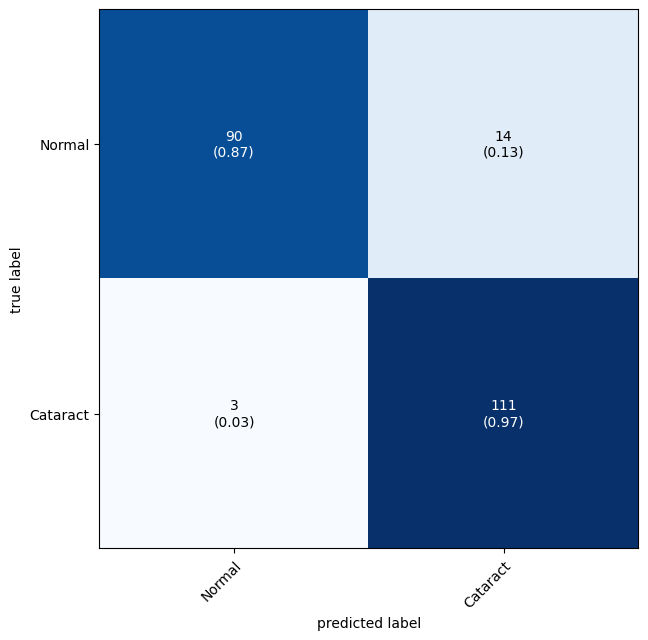

In [100]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

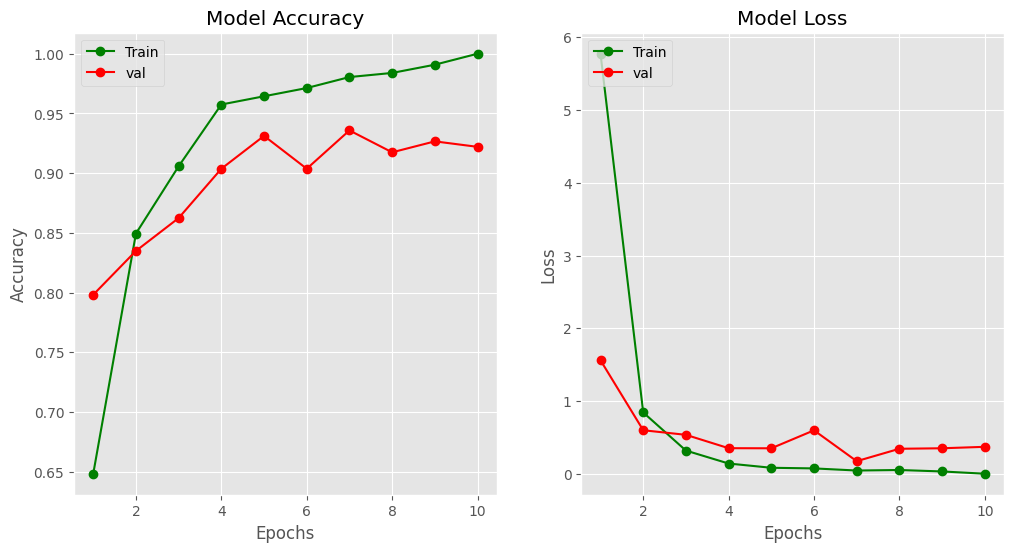

In [101]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history1.history["accuracy"],"go-")
plt.plot(epochs,history1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history1.history["loss"],"go-")
plt.plot(epochs,history1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

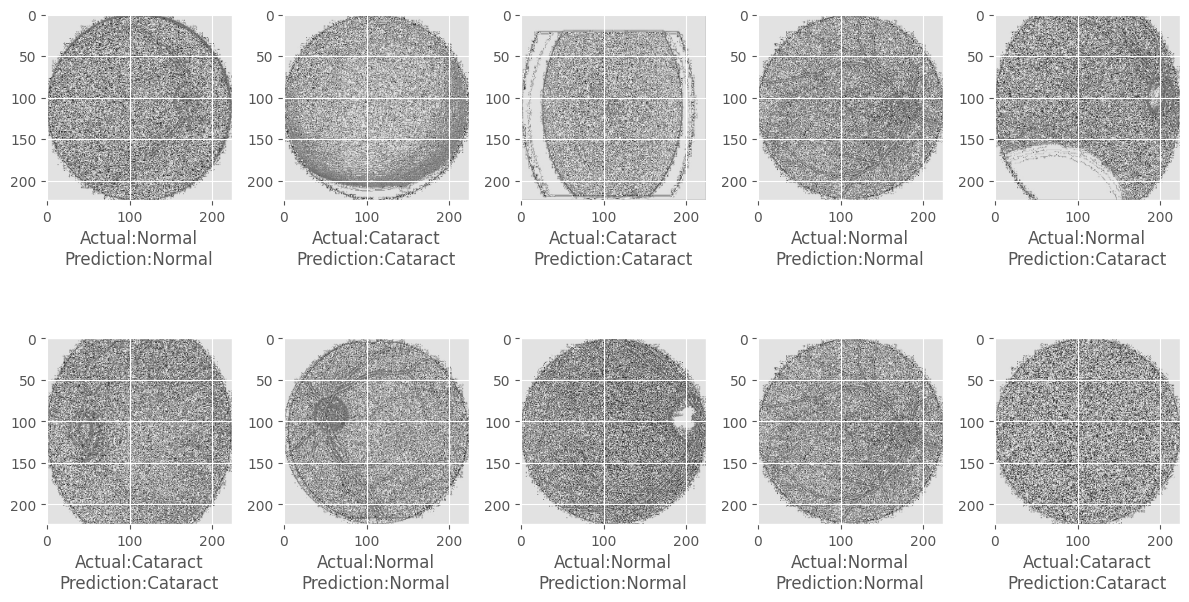

In [102]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred1[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 


# ResNet50

In [103]:
from tensorflow.keras.applications.resnet50 import ResNet50
rnet = ResNet50(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [104]:
for layer in rnet.layers:
    layer.trainable = False

In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model2 = Sequential()
model2.add(rnet)
model2.add(Flatten())
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 23688065 (90.36 MB)
Trainable params: 100353 (392.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [106]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Replace 'period' with 'save_freq' for the ModelCheckpoint
checkpoint = ModelCheckpoint(
    "rnet50.h5", monitor="val_accuracy", verbose=1, save_best_only=True,
    save_weights_only=False, save_freq='epoch'  # Save at the end of every epoch
)

# EarlyStopping monitor 'val_accuracy' to match the checkpoint
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)


In [108]:
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 3.6391 - accuracy: 0.6598
Epoch 1: val_accuracy improved from -inf to 0.82569, saving model to rnet50.h5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 49s 2s/step - loss: 3.6391 - accuracy: 0.6598 - val_loss: 0.8872 - val_accuracy: 0.8257
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.8736
Epoch 2: val_accuracy improved from 0.82569 to 0.88532, saving model to rnet50.h5
28/28 [==============================] - 53s 2s/step - loss: 0.4849 - accuracy: 0.8736 - val_loss: 0.5824 - val_accuracy: 0.8853
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.2263 - accuracy: 0.9253
Epoch 3: val_accuracy improved from 0.88532 to 0.91743, saving model to rnet50.h5
28/28 [==============================] - 55s 2s/step - loss: 0.2263 - accuracy: 0.9253 - val_loss: 0.4189 - val_accuracy: 0.9174
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9609
Epoch 4: val_accuracy improved from 0.91743 to 0.94495, saving model to rnet50.h5
28/28 [==============================] - 55s 2s/step - loss: 0.1272 - accuracy: 0.960

In [109]:
loss,accuracy = model2.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 10s 2s/step - loss: 0.3179 - accuracy: 0.9312
loss: 0.31791308522224426
Accuracy: 0.9311926364898682


In [110]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred2)

7/7 [==============================] - 11s 2s/step


0.9311926605504587

In [111]:
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       104
           1       0.95      0.91      0.93       114

    accuracy                           0.93       218
   macro avg       0.93      0.93      0.93       218
weighted avg       0.93      0.93      0.93       218



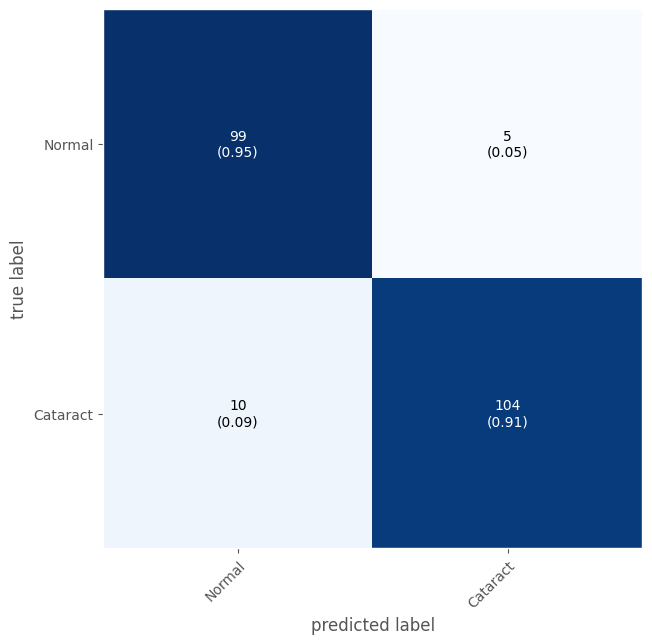

In [112]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);


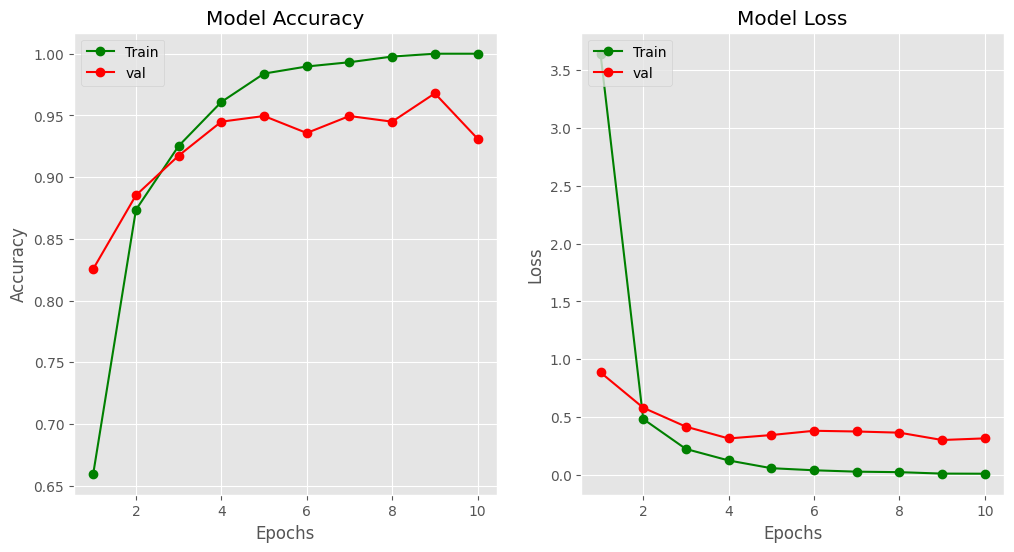

In [113]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history2.history["accuracy"],"go-")
plt.plot(epochs,history2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history2.history["loss"],"go-")
plt.plot(epochs,history2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

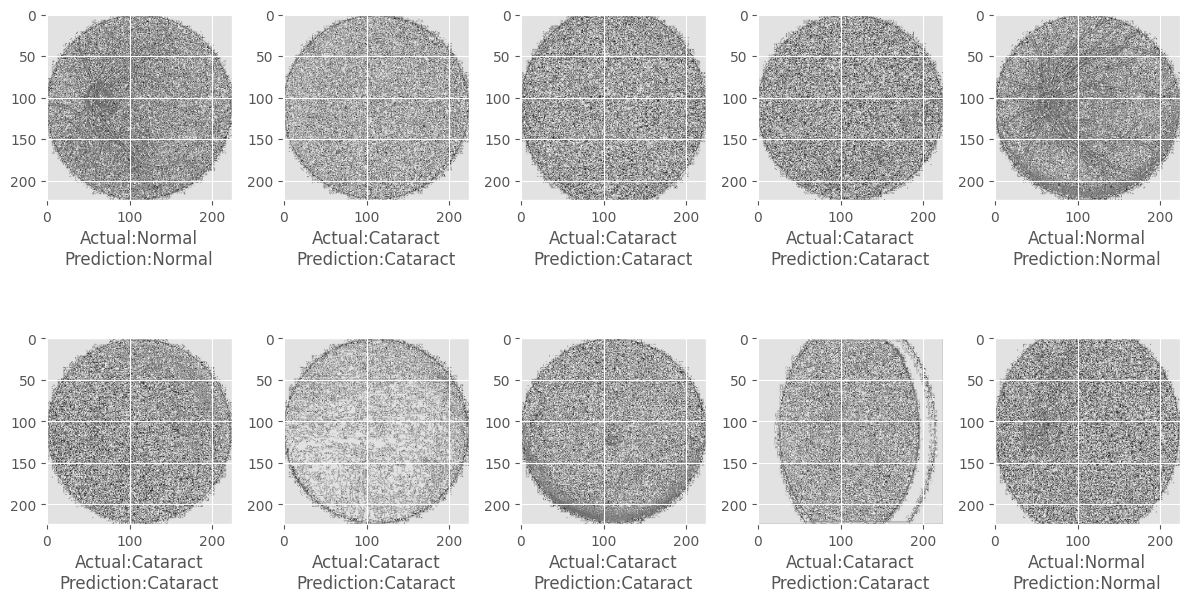

In [114]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred2[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 


# Vision Transfromers

In [115]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

C:\ProgramData\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [116]:
num_classes = 2
input_shape = (224, 224, 3)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (870, 224, 224, 3) - y_train shape: (870,)
x_test shape: (218, 224, 224, 3) - y_test shape: (218,)


In [117]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
image_size = 128 # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 6
mlp_head_units = [512, 256]  

In [118]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [119]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [120]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 128 X 128
Patch size: 6 X 6
Patches per image: 441
Elements per patch: 108


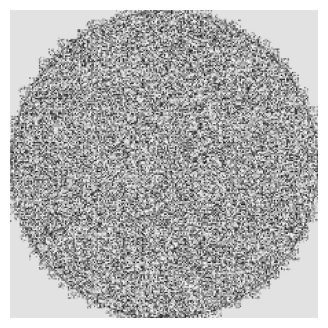

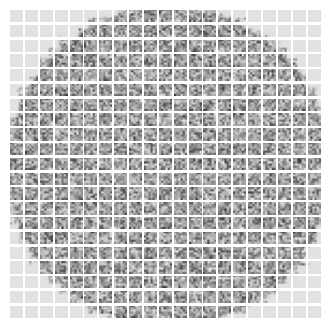

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [122]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [123]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.2)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model3 = keras.Model(inputs=inputs, outputs=logits)
    return model3

In [124]:
model3 = create_vit_classifier()
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 128, 128, 3)          7         ['input_3[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches_1 (Patches)         (None, None, 108)            0         ['data_augmentation[0][0]']   
                                                                                                  
 patch_encoder (PatchEncode  (None, 441, 64)              35200     ['patches_1[0][0]']       

In [125]:
num_epochs = 20


In [126]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa

# Set valid checkpoint directory path
checkpoint_dir = './checkpoints/'
os.makedirs(checkpoint_dir, exist_ok=True)  # Create the directory if it doesn't exist
checkpoint_filepath = os.path.join(checkpoint_dir, "checkpoint")

# Optimizer
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)

# Compile the model
model3.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

# ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

# Train the model
history3 = model3.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
)

# Load the best weights and evaluate the model
model3.load_weights(checkpoint_filepath)
_, accuracy = model3.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


Epoch 1/20
25/25 [==============================] - 115s 4s/step - loss: 2.0932 - accuracy: 0.7318 - val_loss: 0.2704 - val_accuracy: 0.8851
Epoch 2/20
25/25 [==============================] - 118s 5s/step - loss: 0.6398 - accuracy: 0.8174 - val_loss: 0.4561 - val_accuracy: 0.8391
Epoch 3/20
25/25 [==============================] - 120s 5s/step - loss: 0.6209 - accuracy: 0.8020 - val_loss: 0.3772 - val_accuracy: 0.8391
Epoch 4/20
25/25 [==============================] - 117s 5s/step - loss: 0.4064 - accuracy: 0.8480 - val_loss: 0.3238 - val_accuracy: 0.8391
Epoch 5/20
25/25 [==============================] - 120s 5s/step - loss: 0.3667 - accuracy: 0.8582 - val_loss: 0.4408 - val_accuracy: 0.7931
Epoch 6/20
25/25 [==============================] - 118s 5s/step - loss: 0.3759 - accuracy: 0.8582 - val_loss: 0.4231 - val_accuracy: 0.7471
Epoch 7/20
25/25 [==============================] - 180s 7s/step - loss: 0.3365 - accuracy: 0.8557 - val_loss: 0.3358 - val_accuracy: 0.8046
Epoch 8/20
25

In [127]:
loss, accuracy = model3.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 24s 3s/step - loss: 0.2774 - accuracy: 0.8853
loss: 0.27739521861076355
Accuracy: 0.8853210806846619


In [128]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

In [129]:
len(val_acc),len(val_loss),len(acc),len(loss)


(20, 20, 20, 20)

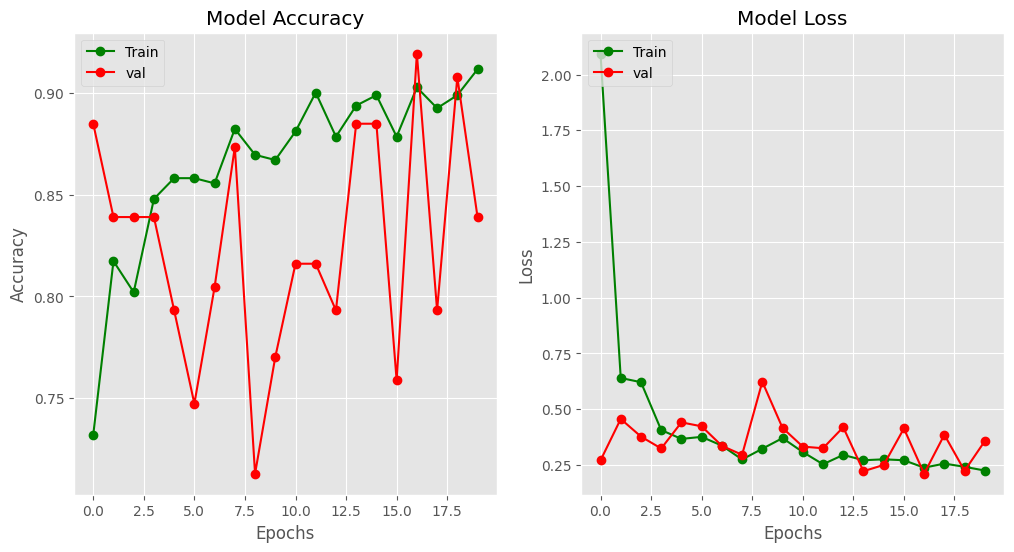

In [130]:
import matplotlib.pyplot as plt
EPOCHS = 20

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history3.history['accuracy'],"go-")
plt.plot(range(EPOCHS), history3.history['val_accuracy'],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history3.history['loss'],"go-")
plt.plot(range(EPOCHS), history3.history['val_loss'],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [131]:
accloss = {'Model':['VGG19','ResNet50','Vision Transformer'],
           'Training_Accuracy':[max(history1.history['accuracy']),max(history2.history['accuracy']),max(history3.history['accuracy'])],
           'Training_Loss':[min(history1.history['loss']),min(history2.history['loss']),min(history3.history['loss'])],
           'Validation_Accuracy':[max(history1.history['val_accuracy']),max(history2.history['val_accuracy']),max(history3.history['val_accuracy'])],
           'Validation_Loss':[min(history1.history['val_loss']),min(history2.history['val_loss']),min(history3.history['val_loss'])]}

In [132]:
accloss

{'Model': ['VGG19', 'ResNet50', 'Vision Transformer'],
 'Training_Accuracy': [1.0, 1.0, 0.9118773937225342],
 'Training_Loss': [0.0030250404961407185,
  0.012641217559576035,
  0.22483152151107788],
 'Validation_Accuracy': [0.9357798099517822,
  0.9678899049758911,
  0.9195402264595032],
 'Validation_Loss': [0.17545300722122192,
  0.30372121930122375,
  0.21064497530460358]}

In [133]:
comp = pd.DataFrame.from_dict(accloss)
comp

,Model,Training_Accuracy,Training_Loss,Validation_Accuracy,Validation_Loss
0,VGG19,1.000000,0.003025,0.93578,0.175453
1,ResNet50,1.000000,0.012641,0.96789,0.303721
2,Vision Transformer,0.911877,0.224832,0.91954,0.210645
